# 의학과 BMI

### Matplotlib에서 폰트 설정

In [1]:
import urllib
from matplotlib import font_manager
from matplotlib import pyplot as plt

font_path = 'NanumGothic.ttf'
with open(font_path, 'wb') as f: 
    f.write(urllib.request.urlopen("https://github.com/team-monolith-product/jupyter-nanum/raw/main/NanumGothic.ttf").read())

# 글꼴을 등록합니다.
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

### [Step1] 데이터 로드

In [2]:
import pandas as pd

df = pd.read_csv('datasets/육군신체측정정보.csv')
df = df[:50000]
df

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,2,2013,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,3,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,4,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,5,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1
...,...,...,...,...,...,...,...,...,...,...
49995,49996,2013,95.9,89.9,180.5,88.1,83.3,59.0,27.9,83.3
49996,49997,2013,110.5,87.5,175.0,103.9,81.0,57.9,26.6,97.7
49997,49998,2013,122.7,85.5,171.0,119.2,78.5,59.0,23.9,111.0
49998,49999,2013,117.2,89.1,178.9,113.4,83.5,56.9,26.1,98.4


### [Step2] 데이터 파악하기

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   순번          50000 non-null  int64  
 1   측정 일자       50000 non-null  int64  
 2   가슴 둘레 센티미터  50000 non-null  float64
 3   소매길이 센티미터   50000 non-null  float64
 4   신장 센티미터     50000 non-null  float64
 5   허리 둘레 센티미터  50000 non-null  object 
 6   샅높이 센티미터    50000 non-null  float64
 7   머리 둘레 센티미터  50000 non-null  float64
 8   발 길이 센티미터   50000 non-null  float64
 9   몸무게 킬로그램    50000 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 3.8+ MB


In [4]:
df.describe()

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
count,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,8.787122e+06,95.938400,87.362204,174.796986,78.853582,57.853790,26.695046,71.692152
std,14433.901067,9.987019e+06,9.042152,2.737865,5.450788,3.595366,1.867921,1.274613,13.671257
min,1.000000,2.013000e+03,75.000000,78.500000,157.700000,69.300000,52.000000,20.600000,40.700000
25%,12500.750000,2.013000e+03,89.400000,85.500000,171.100000,76.300000,56.600000,25.800000,61.800000
50%,25000.500000,2.013000e+03,94.900000,87.300000,174.700000,78.500000,57.800000,26.600000,69.600000
75%,37500.250000,2.014022e+07,101.500000,89.200000,178.400000,81.000000,59.100000,27.500000,79.500000
max,50000.000000,2.014043e+07,133.400000,99.300000,198.200000,102.700000,63.900000,34.200000,134.600000


### [Step3] 데이터 정제하기

In [5]:
df['허리 둘레 센티미터'] = df['허리 둘레 센티미터'].apply(lambda x : float(str(x)[:3])) #소숫점은 버림합니다.
df = df[df['몸무게 킬로그램'] > 20] #몸무게가 20kg 미만일 때는 데이터 오류라 생각하여 데이터를 삭제합니다.
df = df[df['샅높이 센티미터'] > 20] #샅높이가 20cm 미만일 때는 데이터 오류라 생각하여 데이터를 삭제합니다.
#df = df[df['허리 둘레 센티미터'] < 5]
df

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5,82.0,83.8,57.1,28.5,73.2
1,2,2013,101.9,83.8,167.2,81.0,74.4,55.0,24.2,65.1
2,3,20140106,99.5,89.6,179.9,99.0,84.2,56.3,28.1,93.2
3,4,2013,98.6,85.5,171.4,85.0,76.4,54.5,27.4,71.6
4,5,20140106,94.7,88.1,176.9,78.0,79.7,58.5,26.5,67.1
...,...,...,...,...,...,...,...,...,...,...
49995,49996,2013,95.9,89.9,180.5,88.0,83.3,59.0,27.9,83.3
49996,49997,2013,110.5,87.5,175.0,103.0,81.0,57.9,26.6,97.7
49997,49998,2013,122.7,85.5,171.0,119.0,78.5,59.0,23.9,111.0
49998,49999,2013,117.2,89.1,178.9,113.0,83.5,56.9,26.1,98.4


### [Step4] 새로운 열 추가(BMI)

In [6]:
df['BMI'] = df['몸무게 킬로그램']/((df['신장 센티미터']/100)**2)
df

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,BMI
0,1,20140106,96.3,92.6,185.5,82.0,83.8,57.1,28.5,73.2,21.272731
1,2,2013,101.9,83.8,167.2,81.0,74.4,55.0,24.2,65.1,23.286726
2,3,20140106,99.5,89.6,179.9,99.0,84.2,56.3,28.1,93.2,28.797420
3,4,2013,98.6,85.5,171.4,85.0,76.4,54.5,27.4,71.6,24.372012
4,5,20140106,94.7,88.1,176.9,78.0,79.7,58.5,26.5,67.1,21.442077
...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,2013,95.9,89.9,180.5,88.0,83.3,59.0,27.9,83.3,25.567637
49996,49997,2013,110.5,87.5,175.0,103.0,81.0,57.9,26.6,97.7,31.902041
49997,49998,2013,122.7,85.5,171.0,119.0,78.5,59.0,23.9,111.0,37.960398
49998,49999,2013,117.2,89.1,178.9,113.0,83.5,56.9,26.1,98.4,30.744994


### [Step5] 데이터 시각화하기

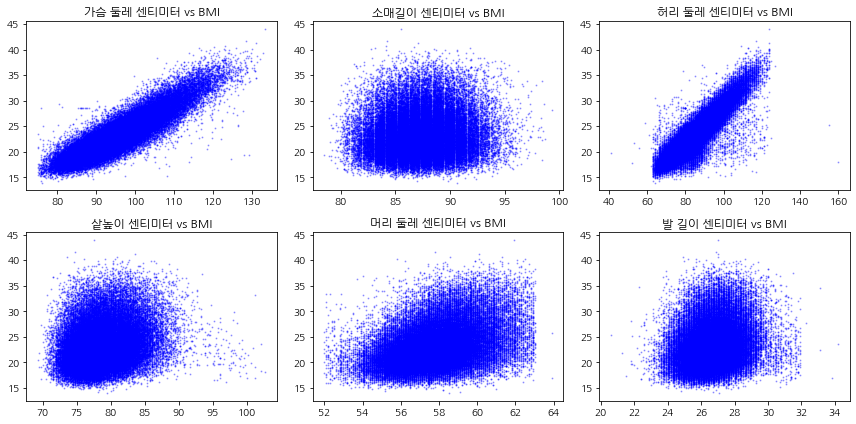

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,6))

features = ['가슴 둘레 센티미터', '소매길이 센티미터', '허리 둘레 센티미터', '샅높이 센티미터', '머리 둘레 센티미터', '발 길이 센티미터']
for i, f in enumerate(features):
    plt.subplot(2, 3, i+1) # (행의수, 열의 수, i+1번째 칸을 뜻합니다)
    plt.scatter(df[f], df['BMI'], s = 1, alpha = 0.3, c = 'b') #산점도 : s는 마커의 크기, c는 색상을 지정, alpha는 투명도 
    plt.title(f'{f} vs BMI') # 그래프의 제목을 순서대로 출력합니다. 

plt.tight_layout( )
plt.show( )

### [Step6] 데이터를 학습데이터와 검증데이터로 분리하기

In [13]:
import numpy as np

#학습데이터와 검증데이터를 8:2이하의 비율로 조절합니다. 
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

#x_train에는 가슴둘레, 소매길이, 허리둘레, 샅높이, 머리둘레, 발길이의 데이터를 넣고 y_train에는 BMI 데이터를 저장합니다. 
x_train = np.array(train[['가슴 둘레 센티미터', '소매길이 센티미터', '허리 둘레 센티미터', '샅높이 센티미터', '머리 둘레 센티미터', '발 길이 센티미터']])
y_train = np.array(train['BMI'])

x_test = np.array(test[['가슴 둘레 센티미터', '소매길이 센티미터', '허리 둘레 센티미터', '샅높이 센티미터', '머리 둘레 센티미터', '발 길이 센티미터']])
y_test = np.array(test['BMI'])

#학습데이터와 검증데이터의 길이를 출려합니다. 
print(len(x_train), len(y_train), len(x_test), len(y_test))

[[101.9  83.8  81.   74.4  55.   24.2]
 [ 99.5  89.6  99.   84.2  56.3  28.1]
 [ 98.6  85.5  85.   76.4  54.5  27.4]
 ...
 [122.7  85.5 119.   78.5  59.   23.9]
 [117.2  89.1 113.   83.5  56.9  26.1]
 [109.7  86.8 102.   82.4  57.9  26.8]] [23.28672649 28.79742034 24.37201222 ... 37.96039807 30.74499433
 32.75128216]
39841 39841 10159 10159


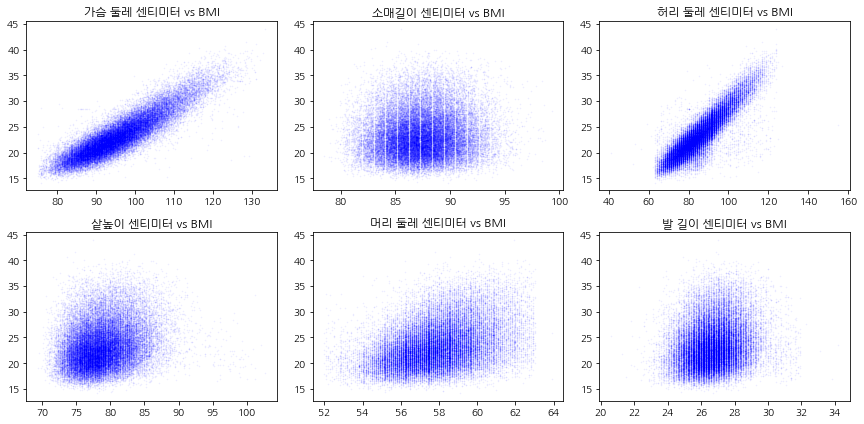

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,6))

features = ['가슴 둘레 센티미터', '소매길이 센티미터', '허리 둘레 센티미터', '샅높이 센티미터', '머리 둘레 센티미터', '발 길이 센티미터']
for i, f in enumerate(features):
    plt.subplot(2, 3, i+1)
    plt.scatter(train[f], train['BMI'], s = 0.5, alpha = 0.05, c = 'b') #파란색으로 train set의 산점도를 출력합니다.
    plt.scatter(test[f], test['BMI'], s = 0.5, alpha = 0.05, c = 'y') #노란색으로 test set의 산점도를 출력하여 비교합니다. 
    plt.title(f'{f} vs BMI')

plt.tight_layout( )
plt.show( )

### [Step7] 모델 구성하기

In [16]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(6),
    keras.layers.Dense(256, activation='relu'), #출력 뉴런의 수 : 256, 활성화 함수 : relu 함수 
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1) #최종 출력 뉴런수는 1개
])

model.build(x_train.shape)

model.compile(optimizer="adam", loss='mse', metrics=['mae']) # optimizer : adam, loss : mean square error, metrics : mae (평균절대오차)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (39841, 6)                42        
                                                                 
 dense_1 (Dense)             (39841, 256)              1792      
                                                                 
 dense_2 (Dense)             (39841, 256)              65792     
                                                                 
 dense_3 (Dense)             (39841, 256)              65792     
                                                                 
 dense_4 (Dense)             (39841, 256)              65792     
                                                                 
 dense_5 (Dense)             (39841, 1)                257       
                                                                 
Total params: 199,467
Trainable params: 199,467
Non-trai

2022-06-28 06:35:17.901240: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### [Step8] 모델 학습하기

In [17]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test), callbacks=[early_stop])

Epoch 1/10
1246/1246 [==============================] - 10s 8ms/step - loss: 4.1033 - mae: 1.4465 - val_loss: 3.1994 - val_mae: 1.3963
Epoch 2/10
1246/1246 [==============================] - 9s 7ms/step - loss: 2.8431 - mae: 1.2981 - val_loss: 2.5263 - val_mae: 1.2158
Epoch 3/10
1246/1246 [==============================] - 9s 7ms/step - loss: 2.7073 - mae: 1.2661 - val_loss: 14.4272 - val_mae: 3.4773
Epoch 4/10
1246/1246 [==============================] - 9s 7ms/step - loss: 2.6685 - mae: 1.2473 - val_loss: 3.5530 - val_mae: 1.4887
Epoch 5/10
1246/1246 [==============================] - 8s 7ms/step - loss: 2.5914 - mae: 1.2358 - val_loss: 2.2519 - val_mae: 1.1511
Epoch 6/10
1246/1246 [==============================] - 9s 7ms/step - loss: 2.4365 - mae: 1.1953 - val_loss: 2.3656 - val_mae: 1.1918
Epoch 7/10
1246/1246 [==============================] - 9s 7ms/step - loss: 2.4675 - mae: 1.2063 - val_loss: 2.5148 - val_mae: 1.2268
Epoch 8/10
1246/1246 [==============================] - 9s 7

### [Step9] 결과 시각화하기

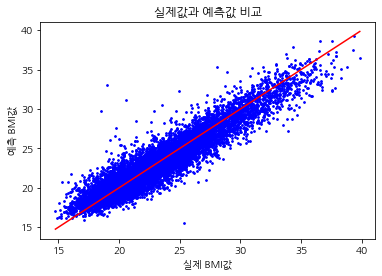

In [14]:
import matplotlib.pyplot as plt

plt.scatter(y_test, model(x_test), s = 3, c = 'b')
plt.plot([y_test.min() + (y_test.max()-y_test.min())/10* i for i in range(11)],[y_test.min() + (y_test.max()-y_test.min())/10* i for i in range(11)], c = 'r')
plt.title("실제값과 예측값 비교")
plt.xlabel('실제 BMI값')
plt.ylabel('예측 BMI값')
plt.show()

### [Step10] BMI 예측 프로그램 만들기

In [15]:
info = []

#신체정보로 가슴 둘레, 소매길이, 허리둘레, 샅높이, 머리 둘레, 발 길이를 입력하면 BMI를 제공합니다.
info.append(int(input(f"당신의 신체정보를 입력하세요 : 가슴 둘레(cm)")))
info.append(int(input(f"당신의 신체정보를 입력하세요 : 소매길이(cm)")))
info.append(int(input(f"당신의 신체정보를 입력하세요 : 허리 둘레(cm)")))
info.append(int(input(f"당신의 신체정보를 입력하세요 : 샅높이(cm)")))
info.append(int(input(f"당신의 신체정보를 입력하세요 : 머리 둘레(cm)")))
info.append(int(input(f"당신의 신체정보를 입력하세요 : 발 길이(cm)")))

print(f'당신의 비만도(BMI)는 {model(np.array([info]))[0,0]:.2f} 입니다.')

---------------------------------------------------------------------------
오류도우미의 설명

<<< 이 오류는 왜 일어났을까요?? >>>
유저가 발생시킨 오류입니다.
주피터 랩의 커널 중지 기능을 통해 발생시킬 수 있습니다.

<<< 오류도우미의 추천 해결방법 >>>

(수정 필요)

KeyboardInterrupt: Interrupted by user